In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
h_train = pd.read_csv('Housing.csv')

In [3]:
h_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
price_a = h_train['price']

Text(0.5, 1.0, 'guestroom')

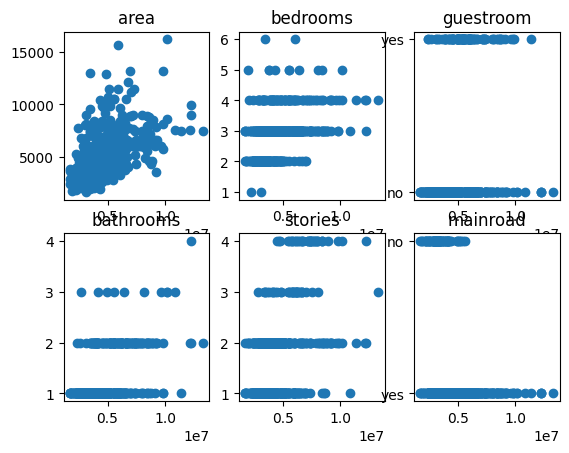

In [36]:

fig, axs = plt.subplots(2,3)
axs[0,0].scatter(price_a, h_train['area'])
axs[0,0].set_title('area')

axs[0,1].scatter(price_a, h_train['bedrooms'])
axs[0,1].set_title('bedrooms')

axs[1,0].scatter(price_a, h_train['bathrooms'])
axs[1,0].set_title('bathrooms')

axs[1,1].scatter(price_a, h_train['stories'])
axs[1,1].set_title('stories')

axs[1,2].scatter(price_a, h_train['mainroad'])
axs[1,2].set_title('mainroad')

axs[0,2].scatter(price_a, h_train['guestroom'])
axs[0,2].set_title('guestroom')


***Manually converting our area plot to z distribution***

In [41]:
area_mean = h_train['area'].mean()
area_std = h_train['area'].std()
price_mean = price_a.mean()
price_std = price_a.std()

In [42]:
norm_area = np.array([])
norm_price = np.array([])

In [44]:
for item in h_train['area']:
    norm_area = np.append(norm_area, (item - area_mean)/area_std)
    
for item in price_a:
    norm_price = np.append(norm_price, (item - price_mean)/price_std)

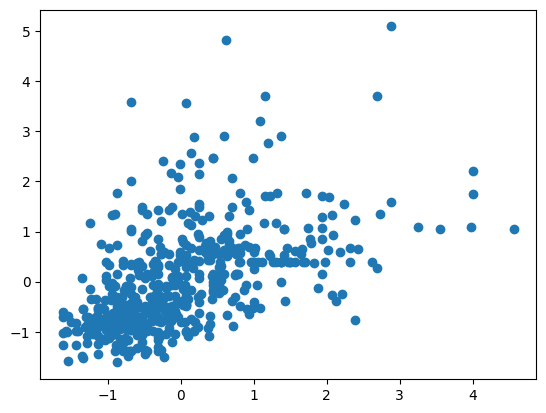

In [46]:
plt.scatter(norm_price, norm_area)

***try to implement gradient descent***

In [55]:
def cost_des_wb(m: int, b: float, w: float, x: list[float], y: list[float]) -> list[float]:
    update = [0,0]
    for i in range(m):
        update[0] += (w*x[i] + b - y[i])*x[i]
        update[1] += (w*x[i] + b - y[i])
    return update

def grad_descent(x: list[float], y: list[float], alpha: float) -> list[float]:
    w = 1
    b = 0
    m = len(x)
    for i in range(10):
        cost = cost_des_wb(m, b, w, x, y)
        w -= (alpha/m)*cost[0]
        b -= (alpha/m)*cost[1]
    return [w,b]

def linear_regression(inp: float, x: list[float], y: list[float], alpha: float) -> float:
    w_b = grad_descent(x, y, alpha)
    return w_b[0]*inp, + w_b[1]